In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

sns.set(rc={'figure.figsize':(5,3)})
sns.set_style("whitegrid")

def p50_estimator(x):                                            
    return np.percentile(x, 50)       
def p95_estimator(x):                                            
    return np.percentile(x, 95)    

## AWS

In [41]:

DATA_DIR = join(pardir, pardir, 'data', 'read')
key_value = pd.read_csv(join(DATA_DIR, 'key_value.csv'), index_col=0)
redis = pd.read_csv(join(DATA_DIR, 'redis.csv'), index_col=0)
persistent = pd.read_csv(join(DATA_DIR, 'persistent.csv'), index_col=0)
zookeeper = pd.read_csv(join(DATA_DIR, 'zookeeper', 'intrazone.csv'), index_col=0)
key_value['data'] /= 1000.0
redis['data'] /= 1000.0
persistent['data'] /= 1000.0
zookeeper['data'] /= 1000.0

key_value['size'] /= 1024.0
redis['size'] /= 1024.0
persistent['size'] /= 1024.0
zookeeper['size'] /= 1024.0

key_value = key_value.drop(key_value[key_value['size'] > 256].index)
persistent = persistent.drop(persistent[persistent['size'] > 256].index)
zookeeper = zookeeper.drop(zookeeper[zookeeper['size'] > 256].index)
print(zookeeper)


        data  native_data             op        size
0      0.859          0.0           read    0.003906
1      0.718          0.0           read    0.003906
2      0.662          0.0           read    0.003906
3      0.607          0.0           read    0.003906
4      1.191          0.0           read    0.003906
...      ...          ...            ...         ...
17012  1.158          0.0           read  256.000000
17013  1.256          0.0           read  256.000000
17014  1.419          0.0           read  256.000000
17015  1.213          0.0           read  256.000000
17016  0.000          NaN  read_capacity  256.000000

[17017 rows x 4 columns]


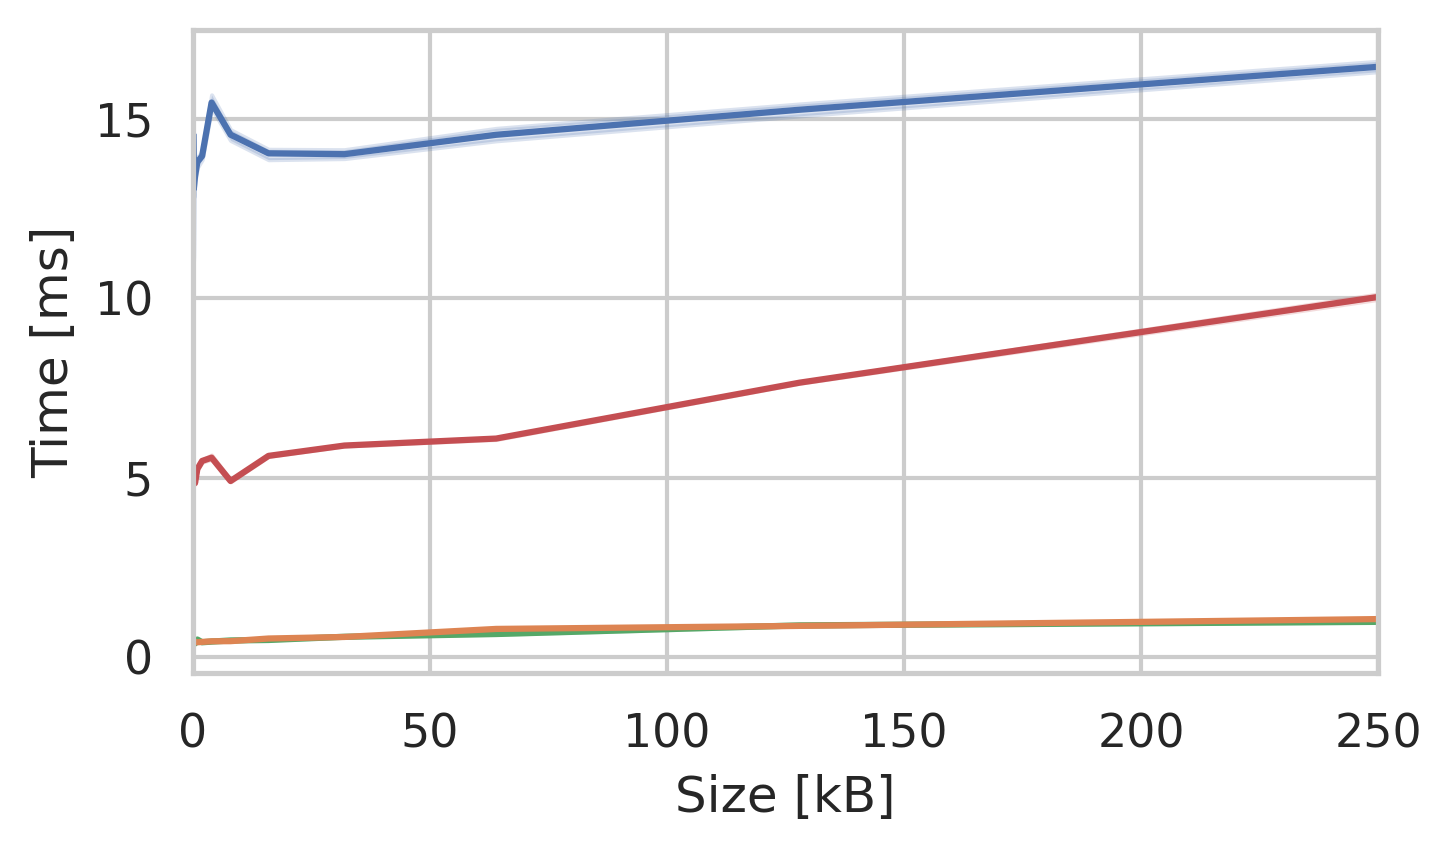

In [42]:

sns.lineplot(
    data=key_value.loc[key_value['op'] == 'write'], x='size', y='data', color='r',
    estimator=p50_estimator, label='FaaSKeeper, DynamoDB')#,fontsize=20)

sns.lineplot(
    data=redis.loc[redis['op'] == 'read'], x='size', y='data', color='g',
    estimator=p50_estimator, label='FaaSKeeper, Redis')#,fontsize=20)

ax = sns.lineplot(data=persistent.loc[persistent['op'] == 'read'], x='size', y='data',
                  estimator=p50_estimator, label='FaaSKeeper, S3')#,fontsize=20)

sns.lineplot(data=zookeeper.loc[zookeeper['op'] == 'read'], x='size', y='data',
             estimator=p50_estimator, label='ZooKeeper (Self-Hosted)')#,fontsize=20)


ax.set_xlim(0, 250)
ax.set_xlabel('Size [kB]',fontsize=12)
ax.set_ylabel('Time [ms]',fontsize=12)

plt.legend().set_visible(False)
plt.rcParams['figure.dpi'] = 300
plt.tight_layout()


for line in ax.lines:
    line.set_visible(False)
    
for line in ax.collections:
    line.set_visible(False)

plt.savefig("read_aws_presentation_empty.png",bbox_inches='tight',pad_inches = 0, transparent=False)

ax.lines[2].set_visible(True)
ax.collections[2].set_visible(True)

plt.savefig("read_aws_presentation_object.png",bbox_inches='tight',pad_inches = 0, transparent=False)

ax.lines[0].set_visible(True)
ax.collections[0].set_visible(True)

plt.savefig("read_aws_presentation_keyvalue.png",bbox_inches='tight',pad_inches = 0, transparent=False)

ax.lines[1].set_visible(True)
ax.collections[1].set_visible(True)

plt.savefig("read_aws_presentation_full_redis.png",bbox_inches='tight',pad_inches = 0, transparent=False)

ax.lines[3].set_visible(True)
ax.collections[3].set_visible(True)

plt.savefig("read_aws_presentation_full.png",bbox_inches='tight',pad_inches = 0, transparent=False)


## GCP

In [31]:

DATA_DIR = join(pardir, pardir, 'data', 'read', 'gcp')
# DynamoDB
key_value = pd.read_csv(join(DATA_DIR, 'datastore.csv'), index_col=0)
#redis = pd.read_csv(join(DATA_DIR, 'redis.csv'), index_col=0)
persistent = pd.read_csv(join(DATA_DIR, 'cloud_storage.csv'), index_col=0)
zookeeper = pd.read_csv(join(pardir, pardir, 'data', 'read', 'zookeeper', 'gcp', 'interzone.csv'), index_col=0)


key_value['data'] /= 1000.0
#redis['data'] /= 1000.0
persistent['data'] /= 1000.0
zookeeper['data'] /= 1000.0
key_value['size'] /= 1024.0
#redis['size'] /= 1024.0
persistent['size'] /= 1024.0
zookeeper['size'] /= 1024.0

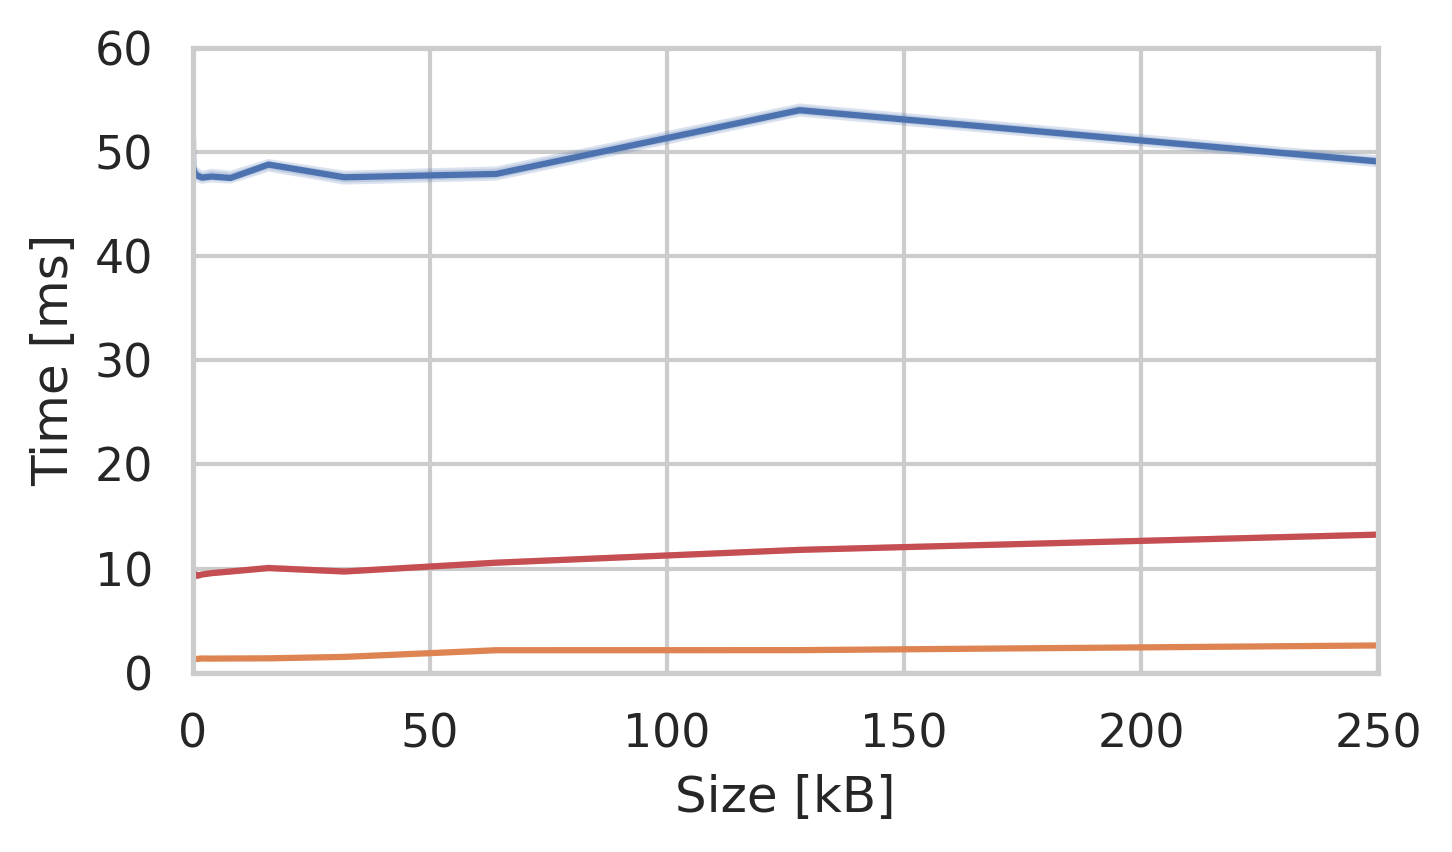

In [38]:


ax = sns.lineplot(
    data=key_value.loc[key_value['op'] == 'read'], x='size', y='data', color='r',
    estimator=p50_estimator, label='FaaSKeeper, Datastore')

ax = sns.lineplot(data=persistent.loc[persistent['op'] == 'read'], x='size', y='data',
                  estimator=p50_estimator, label='FaaSKeeper, Cloud Storage',ax=ax)#,fontsize=20)

sns.lineplot(data=zookeeper.loc[zookeeper['op'] == 'read'], x='size', y='data',
             #estimator=p50_estimator, label='ZooKeeper (Self-Hosted)',ax=ax)#,fontsize=20)
             estimator=p50_estimator, label='ZooKeeper',ax=ax)#,fontsize=20)

ax.set_xlabel('Size [kB]',fontsize=12)
ax.set_ylabel('Time [ms]',fontsize=12)
ax.set_xlim(0, 250)
ax.set_ylim(0, 60)
#ax.set_title("Google Cloud Platorm (GCP)", fontweight='bold', fontsize=16)

plt.legend().set_visible(False)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.31), ncol=3)
plt.rcParams['figure.dpi'] = 300
plt.tight_layout()

for line in ax.lines:
    line.set_visible(False)
    
for line in ax.collections:
    line.set_visible(False)

plt.savefig("read_gcp_presentation_empty.png",bbox_inches='tight',pad_inches = 0, transparent=False)


ax.lines[1].set_visible(True)
ax.collections[1].set_visible(True)

plt.savefig("read_gcp_presentation_object.png",bbox_inches='tight',pad_inches = 0, transparent=False)

ax.lines[0].set_visible(True)
ax.collections[0].set_visible(True)

plt.savefig("read_gcp_presentation_keyvalue.png",bbox_inches='tight',pad_inches = 0, transparent=False)

ax.lines[2].set_visible(True)
ax.collections[2].set_visible(True)

plt.savefig("read_gcp_presentation_full.png",bbox_inches='tight',pad_inches = 0, transparent=False)


In [36]:
ax.lines[2].get_color()

(0.8666666666666667, 0.5176470588235295, 0.3215686274509804)